Random Forest Accuracy: 0.51
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       983
           1       0.52      0.51      0.51      1017

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.501
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       983
           1       0.51      0.51      0.51      1017

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



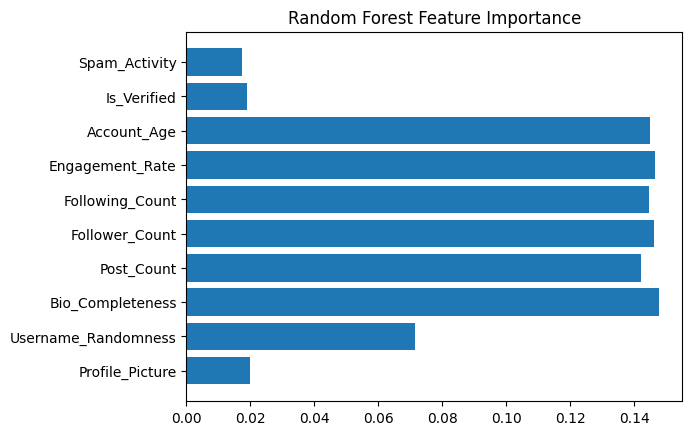

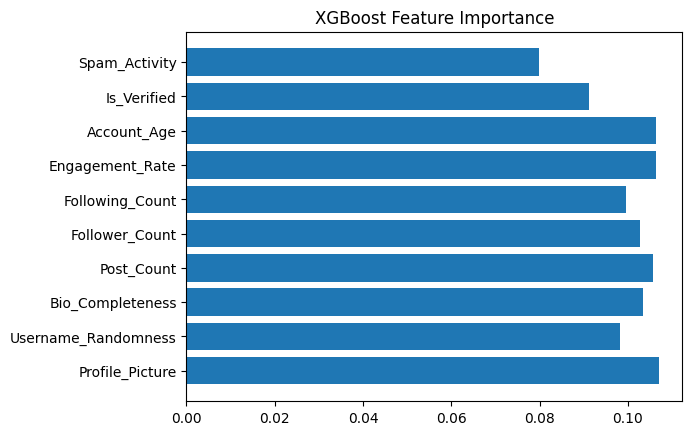

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
# Assuming `data.csv` contains the parameters
file_path = '/content/synthetic_fake_account_dataset.csv'  # Replace with actual path
data = pd.read_csv(file_path)

# Step 2: Preprocess the Data
# Separate features and target variable
X = data.drop(columns=["Output"])  # Features
y = data["Output"]  # Target variable

# Standardizing the dataset (especially for models like XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Step 5: Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Step 6: Feature Importance (Optional)
import matplotlib.pyplot as plt
importances_rf = rf_model.feature_importances_
importances_xgb = xgb_model.feature_importances_

# Random Forest Feature Importance
plt.barh(data.columns[:-1], importances_rf)
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost Feature Importance
plt.barh(data.columns[:-1], importances_xgb)
plt.title("XGBoost Feature Importance")
plt.show()
